In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
os.chdir("..")

In [3]:
from recoexplainer.config import cfg
from recoexplainer.data_reader import DataReader
from recoexplainer.models import EMF

from recoexplainer.recommender import RankPredictionsRecommender

In [4]:
data = DataReader(**cfg.ml100k)
data.make_consecutive_ids_in_dataset()

In [5]:
data.dataset

,userId,itemId,rating,timestamp
0,0,0,3,891717742
1,1,1,1,878887116
2,2,2,2,880606923
3,3,3,1,886397596
4,4,4,4,884182806
...,...,...,...,...
99994,875,172,3,880175444
99995,708,247,5,879795543
99996,36,1004,1,874795795
99997,57,443,2,882399156


In [6]:
_, row = next(data.dataset.iterrows())

In [7]:
row

userId               0
itemId               0
rating               3
timestamp    891717742
Name: 0, dtype: int64

In [8]:
emf = EMF(**cfg.model.emf)

In [9]:
emf.fit(data)

True

In [10]:
mf = EMF(**cfg.model.mf)
mf.fit(data)

True

In [11]:
rec = RankPredictionsRecommender(data, emf)

In [12]:
rec = rec.recommend_all()

In [13]:
rec

,userId,itemId,rank
171,0.0,199.0,1.0
9,0.0,11.0,2.0
163,0.0,190.0,3.0
83,0.0,99.0,4.0
197,0.0,229.0,5.0
...,...,...,...
225,942.0,239.0,6.0
104,942.0,111.0,7.0
555,942.0,571.0,8.0
283,942.0,297.0,9.0


In [14]:
from recoexplainer.explain import EMFExplainer

In [15]:
explanations = EMFExplainer(emf, rec, data)

In [16]:
res = explanations.explain_recommendations()

In [17]:
res

,userId,itemId,rank,explanations
171,0.0,199.0,1.0,"{2: 1, 3: 1, 4: 1, 5: 3}"
9,0.0,11.0,2.0,"{3: 1, 4: 5, 5: 2}"
163,0.0,190.0,3.0,"{4: 3, 5: 3}"
83,0.0,99.0,4.0,"{4: 1, 5: 4}"
197,0.0,229.0,5.0,"{2: 1, 3: 1, 4: 1, 5: 4}"
...,...,...,...,...
225,942.0,239.0,6.0,{}
104,942.0,111.0,7.0,{}
555,942.0,571.0,8.0,{}
283,942.0,297.0,9.0,{}


In [18]:
sum(res.explanations.apply(lambda x: len(x) > 0))

5819

In [28]:
import random
user_X = random.choice(data.dataset.userId.unique())

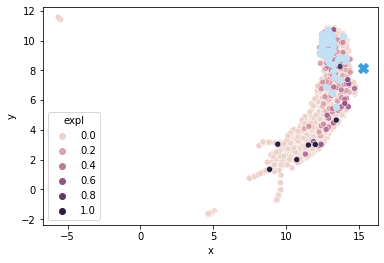

In [30]:
import umap


dim_red_emf = umap.UMAP().fit_transform(emf.item_embedding())
dim_red_emf_usr = umap.UMAP().fit_transform(emf.user_embedding())



rated_items = data.dataset[data.dataset.userId == user_X].itemId


item_emb_mf_for_user_X = item_emb_mf_for_user_X.sort_values(by=['expl'])


item_emb_emf_for_user_X = pd.DataFrame.from_dict({
    'x': dim_red_emf[:,0],
    'y': dim_red_emf[:,1],
    'expl': emf.explainability_matrix[user_X, :]
})

item_emb_emf_for_user_X = item_emb_emf_for_user_X.sort_values(by=['expl'])



import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.scatterplot(data=item_emb_emf_for_user_X, x="x", y="y", hue="expl")

plt.scatter(dim_red_emf[rated_items,0], 
            dim_red_emf[rated_items,1], 
            marker='o', c='#c3e0f4')

plt.scatter(dim_red_emf_usr[user_X,0], 
            dim_red_emf_usr[user_X,1], 
            marker='X', s=100, c='#419ede')



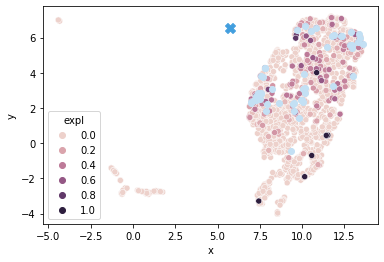

In [31]:
dim_red_mf = umap.UMAP().fit_transform(mf.item_embedding())
dim_red_mf_usr = umap.UMAP().fit_transform(mf.user_embedding())

item_emb_mf_for_user_X = pd.DataFrame.from_dict({
    'x': dim_red_mf[:,0],
    'y': dim_red_mf[:,1],
    'expl': mf.explainability_matrix[user_X, :]
})

rated_items = data.dataset[data.dataset.userId == user_X].itemId


item_emb_mf_for_user_X = pd.DataFrame.from_dict({
    'x': dim_red_mf[:,0],
    'y': dim_red_mf[:,1],
    'expl': mf.explainability_matrix[user_X, :]
})

item_emb_mf_for_user_X = item_emb_mf_for_user_X.sort_values(by=['expl'])


item_emb_emf_for_user_X = pd.DataFrame.from_dict({
    'x': dim_red_emf[:,0],
    'y': dim_red_emf[:,1],
    'expl': emf.explainability_matrix[user_X, :]
})

item_emb_emf_for_user_X = item_emb_emf_for_user_X.sort_values(by=['expl'])



import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.scatterplot(data=item_emb_mf_for_user_X, x="x", y="y", hue="expl")

plt.scatter(dim_red_mf[rated_items,0], 
            dim_red_mf[rated_items,1], 
            marker='o', c='#c3e0f4')

plt.scatter(dim_red_mf_usr[user_X,0], 
            dim_red_mf_usr[user_X,1], 
            marker='X', s=100, c='#419ede')